# Introduction to Pandas
Reference youtube link: https://youtu.be/i8obZvU-TTk




Step#1: Import Pandas library 

In [0]:
import pandas as pd

Step#2: Create your first data frame

In [3]:
first_df = pd.DataFrame({"city_id":[101,102,103,104]})
first_df

,city_id
0,101
1,102
2,103
3,104


Step#3: Create a Dataframe with City_id, City, Temperature


In [4]:
df1 = pd.DataFrame({"city_id":[101,102,103,104],"city":["Mumbai","Pune","Delhi","Solapur"],"temperature":[20,22,24,30]})
df1

,city_id,city,temperature
0,101,Mumbai,20
1,102,Pune,22
2,103,Delhi,24
3,104,Solapur,30



Step#4: Create a Dataframe with City_id, City, Humidity




In [5]:
df2 = pd.DataFrame({"city_id":[101,102,103,104],"city":["Mumbai","Pune","Delhi","Solapur"],"humidity":[60,70,72,68]})
df2

,city_id,city,humidity
0,101,Mumbai,60
1,102,Pune,70
2,103,Delhi,72
3,104,Solapur,68


Step#5: Merge the dataframes df1 and df2


In [6]:
df3 = pd.merge(df1,df2,on="city_id")
df3

,city_id,city_x,temperature,city_y,humidity
0,101,Mumbai,20,Mumbai,60
1,102,Pune,22,Pune,70
2,103,Delhi,24,Delhi,72
3,104,Solapur,30,Solapur,68


# Visualization using Pandas and Matplotlib
Reference youtube link: https://youtu.be/i8obZvU-TTk


**Importing Data**  </br>

 </br>
From a CSV file </br>
pd.read_csv(filename)  </br>

</br>
From a delimited text file (like TSV) </br>
pd.read_table(filename)  </br>

</br>
From an Excel file </br>
pd.read_excel(filename) </br>

</br>
Read from a SQL table/database </br>
pd.read_sql(query, connection_object)  </br>

</br>
Read from a JSON formatted string, URL or file. </br>
pd.read_json(json_string) </br>

</br>
Parses an html URL, string or file and extracts tables to a list of dataframes  </br>
pd.read_html(url)  </br>

</br>

Takes the contents of your clipboard</br>
pd.read_clipboard() </br>

</br>

**Exporting Data** </br>

</br>

Write to a CSV file </br>
df.to_csv(filename) 

</br>
Write to an Excel file </br>
df.to_excel(filename) </br>

</br>
Write to a SQL table</br>
df.to_sql(table_name, connection_object)</br> 

</br>

Write to a file in JSON format</br>
df.to_json(filename) </br>
</br>


In [7]:
import matplotlib.pyplot as plt
import pandas as pd

#change the path to your file location
covid_df = pd.read_csv('/content/drive/My Drive/Webinars/Intro_to_Pandas/covid_19.csv')

covid_df.head()

,Unnamed: 0,Date,Country,Confirmed,Recovered,Deaths
0,0,2020-01-22,Afghanistan,0,0,0
1,1,2020-01-22,Albania,0,0,0
2,2,2020-01-22,Algeria,0,0,0
3,3,2020-01-22,Andorra,0,0,0
4,4,2020-01-22,Angola,0,0,0


In [9]:
#top 10 countries on June-10-2020

covid_df_June10 = covid_df[covid_df['Date'] == '2020-06-10']

covid_df_top10 = covid_df_June10.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)[:10]

covid_df_top10

Country
US                2000702
Brazil             772416
Russia             493023
United Kingdom     291588
India              286605
Spain              242280
Italy              235763
Peru               208823
France             192068
Germany            186522
Name: Confirmed, dtype: int64

In [10]:

#filter data for USA

df_usa = covid_df[covid_df['Country'] == 'US']
df_usa = df_usa[df_usa['Date'] >= '2020-05-01']

print(df_usa.head(10))
print(df_usa.tail(10))


       Unnamed: 0        Date Country  Confirmed  Recovered  Deaths
18974       18974  2020-05-01      US    1104661     164015   65040
19162       19162  2020-05-02      US    1133807     175382   66465
19350       19350  2020-05-03      US    1159365     180152   67785
19538       19538  2020-05-04      US    1181728     187180   69031
19726       19726  2020-05-05      US    1205808     189791   71179
19914       19914  2020-05-06      US    1230968     189910   73566
20102       20102  2020-05-07      US    1258742     195036   75775
20290       20290  2020-05-08      US    1285782     198993   77280
20478       20478  2020-05-09      US    1311445     212534   78895
20666       20666  2020-05-10      US    1331180     216169   79628
       Unnamed: 0        Date Country  Confirmed  Recovered  Deaths
25178       25178  2020-06-03      US    1851626     479258  107201
25366       25366  2020-06-04      US    1872805     485002  108235
25554       25554  2020-06-05      US    1902810

In [0]:
#remove year from date 
#2020-05-01 TO 05/01
date_formatted= pd.to_datetime(df_usa['Date']).dt.strftime('%m/%d')


#print(date_formatted)

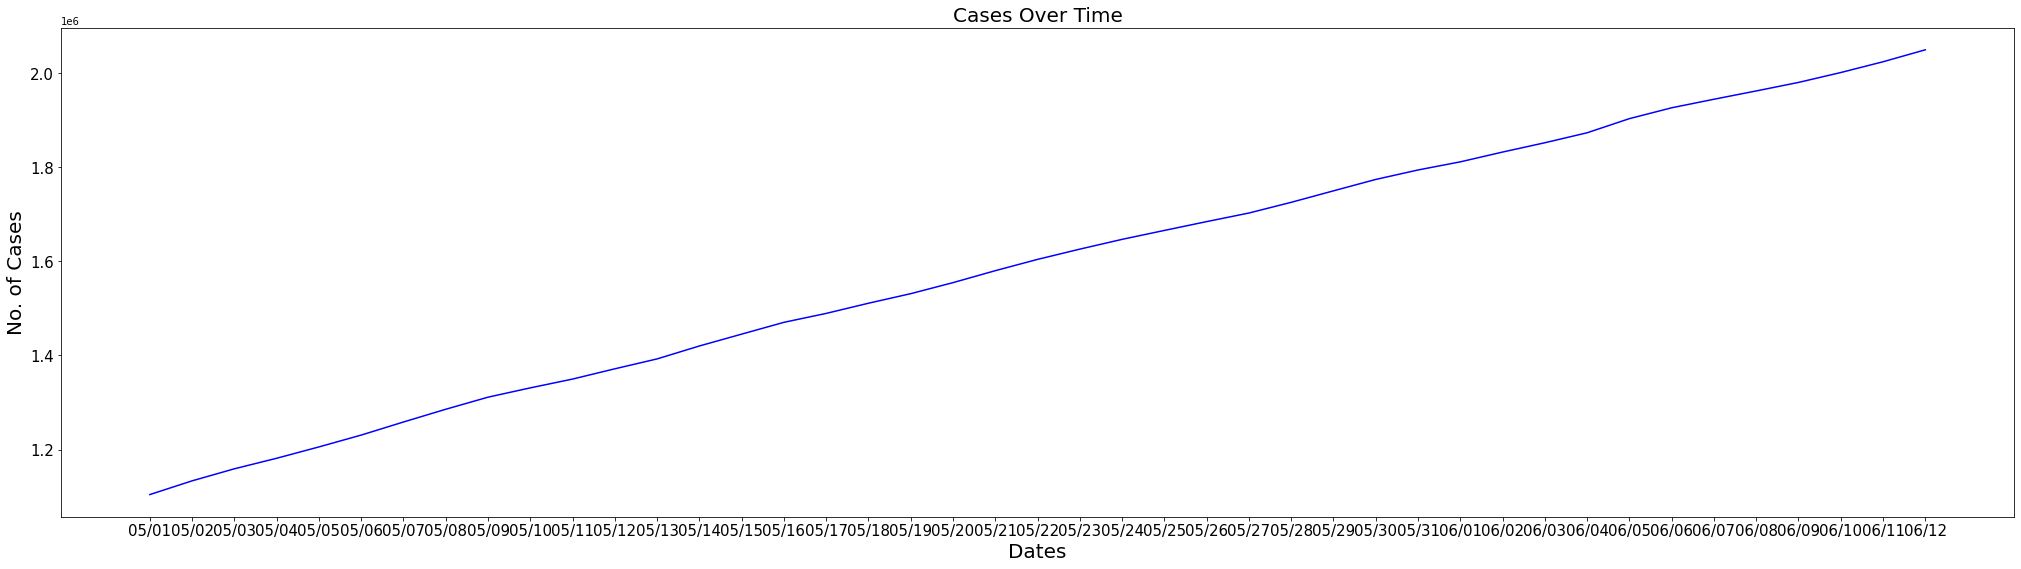

In [12]:
#PLOT CONFIRMED CASES
plt.figure(figsize=(35, 9))
plt.plot(date_formatted, df_usa['Confirmed'],color='b')


plt.title('Cases Over Time', size=20)
plt.xlabel('Dates', size=20)
plt.ylabel('No. of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

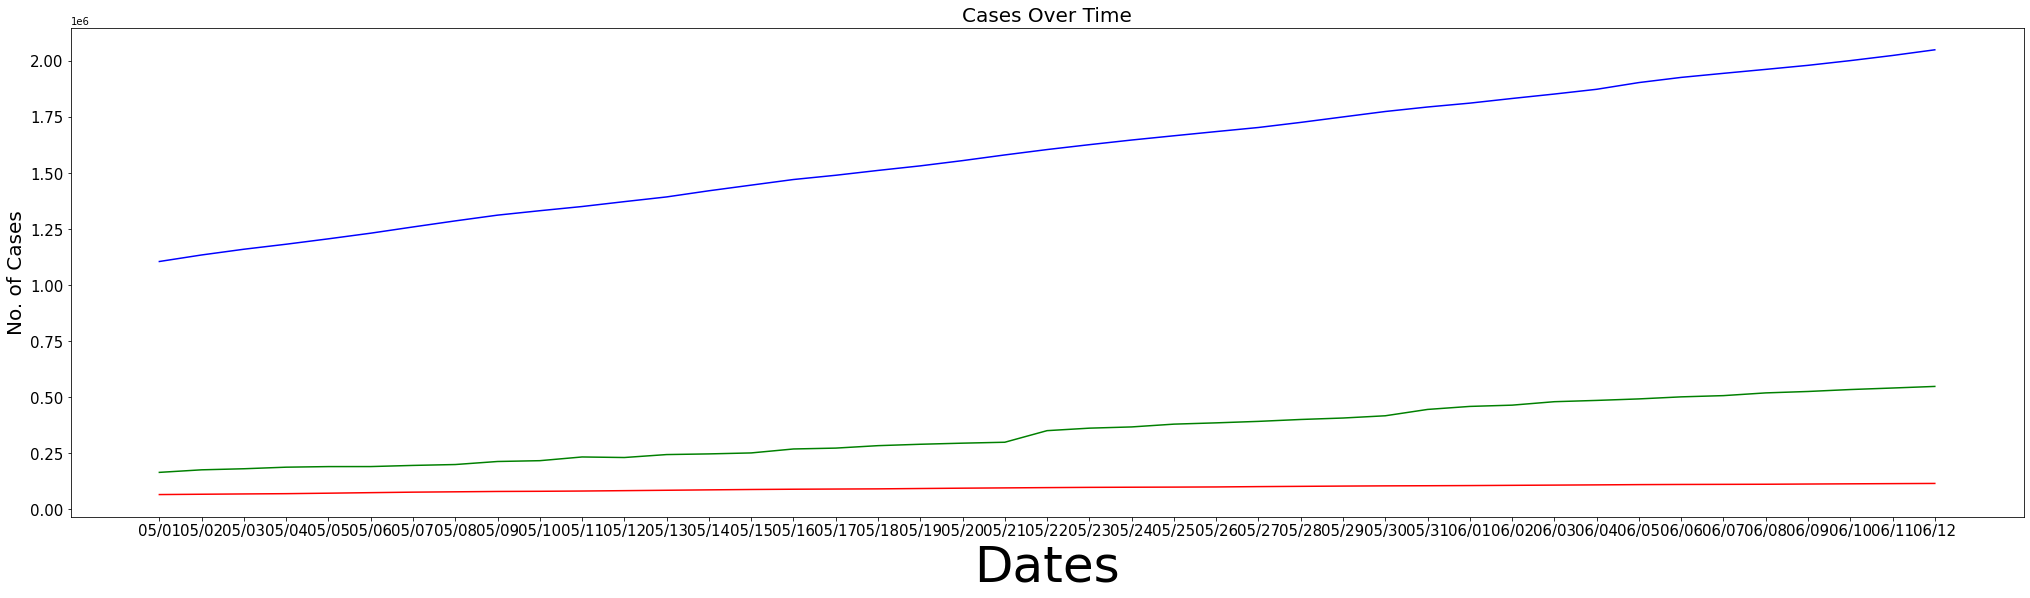

In [13]:

plt.figure(figsize=(35, 9))
plt.plot(date_formatted, df_usa['Confirmed'],color='b')
plt.plot(date_formatted, df_usa['Deaths'] ,color='r')
plt.plot(date_formatted, df_usa['Recovered'],color='g')

plt.title('Cases Over Time', size=20)
plt.xlabel('Dates', size=50)
plt.ylabel('No. of Cases', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [0]:
# DO NOT USE

plt.rcParams["figure.figsize"]=10,10

#  'Confirmed'
df_usa.plot(kind = 'bar', x = 'Date', y = 'Confirmed', color = 'blue')

#GCA stands for Get Current Axes. Same as with plt. gcf() , 
#you can use plt. gca() to get a reference to the current axes

axes1 = plt.gca()

df_usa.plot(kind = 'bar', x = 'Date', y = 'Deaths', color = 'red', ax = axes1)
plt.show()